## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_InitialDoE_Feb.csv', firstRow=120, lastRow=126)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_080223_S121-126.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse water addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=76s and ended at t=490s; mass=45.23525g
This equals a volume of 45.326m; expected was 45.676mL; error is 0.767%


## Analyise surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


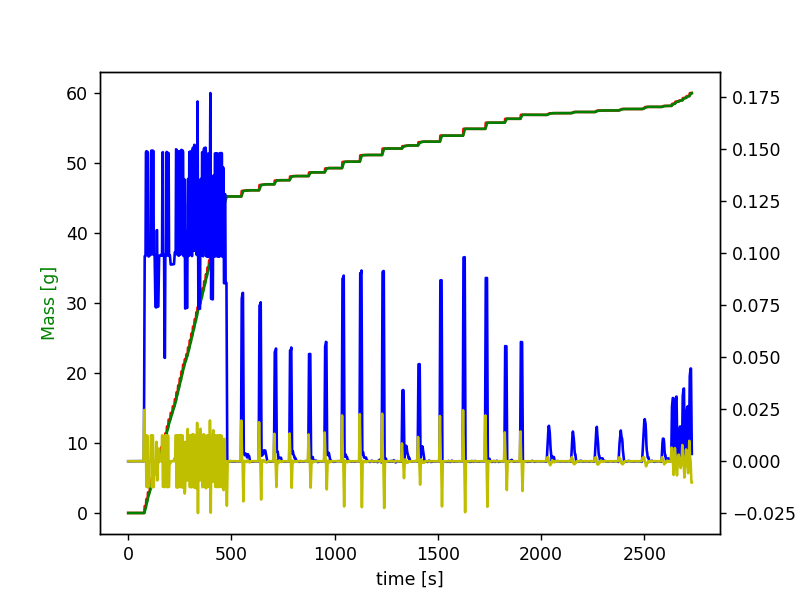

Addition of 0.887g Plantacare 2000 detected from 544s to 594s - expected volume = 0.966mL and actual volume = 0.816mL (resulting error is 15.552%)
Addition of 0.859g Plantacare 2000 detected from 630s to 678s - expected volume = 0.741mL and actual volume = 0.786mL (resulting error is 6.049%)
Addition of 0.588g Plantacare 2000 detected from 704s to 748s - expected volume = 0.51mL and actual volume = 0.536mL (resulting error is 5.0%)
Addition of 0.594g Plantacare 2000 detected from 778s to 816s - expected volume = 0.51mL and actual volume = 0.541mL (resulting error is 6.018%)
Addition of 0.533g Dehyton MC detected from 870s to 902s - expected volume = 0.528mL and actual volume = 0.493mL (resulting error is 6.491%)
Addition of 0.611g Dehyton MC detected from 948s to 984s - expected volume = 0.528mL and actual volume = 0.565mL (resulting error is 7.123%)
Addition of 0.92g Dehyton MC detected from 1032s to 1068s - expected volume = 0.817mL and actual volume = 0.854mL (resulting error is 4.5

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


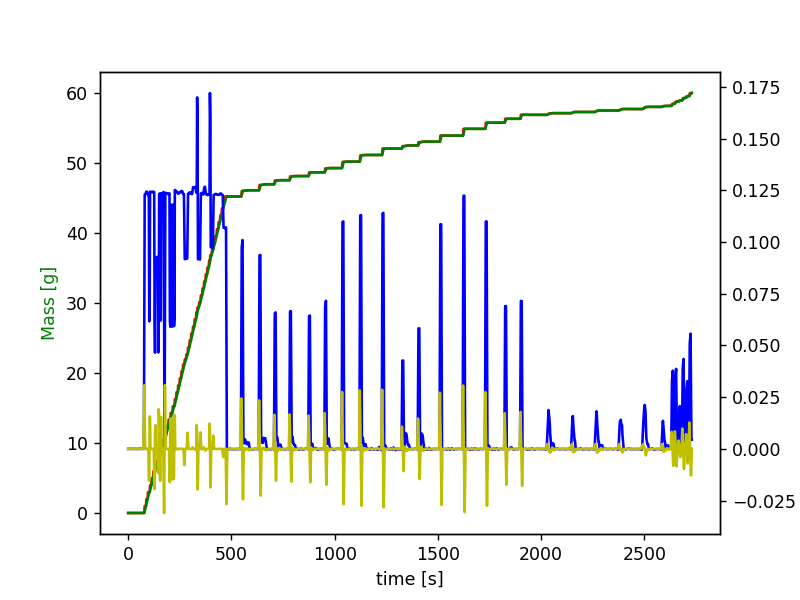

Addition of 0.244g Luviquat Excellence detected from 2024s to 2068s - expected volume = 0.236mL and actual volume = 0.221mL (resulting error is 6.25%)
Addition of 0.173g Luviquat Excellence detected from 2142s to 2172s - expected volume = 0.153mL and actual volume = 0.156mL (resulting error is 1.912%)
Addition of 0.219g Luviquat Excellence detected from 2256s to 2302s - expected volume = 0.18mL and actual volume = 0.197mL (resulting error is 9.562%)
Addition of 0.215g Luviquat Excellence detected from 2372s to 2404s - expected volume = 0.191mL and actual volume = 0.196mL (resulting error is 2.5%)
Addition of 0.311g Luviquat Excellence detected from 2486s to 2526s - expected volume = 0.273mL and actual volume = 0.283mL (resulting error is 3.542%)
Addition of 0.149g Luviquat Excellence detected from 2580s to 2622s - expected volume = 0.117mL and actual volume = 0.134mL (resulting error is 14.423%)


In [5]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=6, mergeSens=6, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.0011250000000000001 g/s^2


<IPython.core.display.Javascript object>


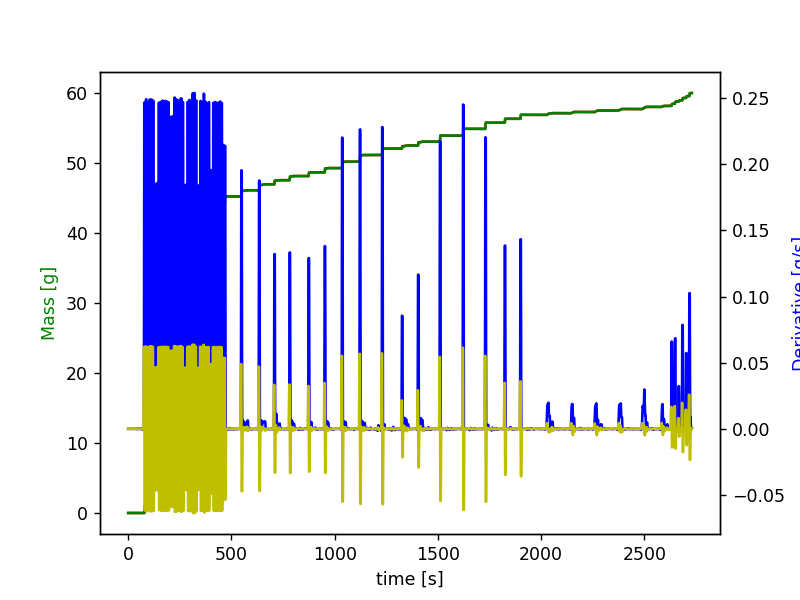

Addition of 0.302g Arlypon TT detected from 2628s to 2644s - expected volume = 0.356mL and actual volume = 0.316mL (resulting error is 11.176%)
Addition of 0.311g Arlypon TT detected from 2644s to 2660s - expected volume = 0.302mL and actual volume = 0.324mL (resulting error is 7.241%)
Addition of 0.166g Arlypon TT detected from 2662s to 2678s - expected volume = 0.135mL and actual volume = 0.172mL (resulting error is 27.692%)
Addition of 0.349g Arlypon TT detected from 2680s to 2696s - expected volume = 0.356mL and actual volume = 0.365mL (resulting error is 2.5%)
Addition of 0.261g Arlypon TT detected from 2698s to 2714s - expected volume = 0.241mL and actual volume = 0.273mL (resulting error is 13.261%)
Addition of 0.444g Arlypon TT detected from 2714s to 2730s - expected volume = 0.468mL and actual volume = 0.462mL (resulting error is 1.444%)


In [6]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=9, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [7]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_S121-S126.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_24132\3681053587.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
120,121.0,0.0,0.0,0.0,0.0,8.946543,0.000000,0.000000,0.000000,0.000000,9.866725,0.000000,0.000000,2.459366,0.0,0.0,0.0,0.0,3.047092
121,122.0,0.0,0.0,0.0,0.0,8.446652,0.000000,0.000000,0.000000,0.000000,0.000000,8.760328,0.000000,1.703588,0.0,0.0,0.0,0.0,3.058101
122,123.0,0.0,0.0,0.0,0.0,11.596840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.017832,2.150425,0.0,0.0,0.0,0.0,1.629073
123,124.0,0.0,0.0,0.0,0.0,0.000000,11.271376,9.111916,0.000000,0.000000,0.000000,0.000000,0.000000,2.121514,0.0,0.0,0.0,0.0,3.434833
124,125.0,0.0,0.0,0.0,0.0,0.000000,9.132396,0.000000,9.802508,0.000000,0.000000,0.000000,0.000000,3.083759,0.0,0.0,0.0,0.0,2.586139
125,126.0,0.0,0.0,0.0,0.0,0.000000,9.482096,0.000000,0.000000,8.555475,0.000000,0.000000,0.000000,1.466329,0.0,0.0,0.0,0.0,4.371878
